## Project for rmrb - Part #[2]

In [20]:
import pandas as pd
from wordcloud import WordCloud
import nltk

import os
import itertools
from collections import Counter  # For words counting

from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
# Read in the corpus
rmrb = pd.read_csv("/Users/linghuiwu/Box/rmrb/final_corpus_rmrb.csv", index_col=0)
rmrb.head()

,year,month,date,issue,column,date_title,title,author,text,tokenized_sent,token_para
64375,1965,1,1965-01-03,2,NaN,1965-01-03坚决破除迷信 改进原有设计,坚决破除迷信 改进原有设计,NaN,坚决破除迷信 改进原有设计洛阳轴承厂在严格的科学精神指导下，开展群众性的技术革新活动，轴承品...,"[['坚决', '破除迷信', '改进', '原有', '设计'], ['洛阳', '轴承厂...","['坚决 破除迷信 改进 原有 设计', '洛阳 轴承厂 严格 科学 精神 指导 开展 群众..."
64388,1965,1,1965-01-03,3,NaN,1965-01-03用新的斗争和新的成就迎接新的一年,用新的斗争和新的成就迎接新的一年,NaN,用新的斗争和新的成就迎接新的一年金日成首相号召朝鲜人民努力完成七年计划和加强反修斗争艾地主席...,"[['斗争', '成就', '迎接', '一年', '金日成', '首相', '号召', '...",['斗争 成就 迎接 一年 金日成 首相 号召 朝鲜 人民 努力完成 七年 计划 加强 反修...
64446,1965,1,1965-01-05,2,社论,1965-01-05革命的大会 民主的大会 团结的大会——庆祝第三届全国人民代表大会第一次会...,革命的大会 民主的大会 团结的大会——庆祝第三届全国人民代表大会第一次会议的伟大成就,NaN,革命的大会 民主的大会 团结的大会第三届全国人民代表大会第一次会议胜利闭幕了。会议听取了周恩...,"[['革命', '大会', '民主', '大会', '团结', '大会'], ['第三届',...","['革命 大会 民主 大会 团结 大会', '第三届 全国人民代表大会 第一次 会议 胜利 ..."
64573,1965,1,1965-01-08,4,NaN,1965-01-08美帝陷入各国人民四面八方包围之中 约翰逊反革命两手挽救不了失败命运,美帝陷入各国人民四面八方包围之中 约翰逊反革命两手挽救不了失败命运,NaN,朝越坦等国舆论抨击约翰逊国情咨文以和平词藻掩饰侵略野心美帝陷入各国人民四面八方包围之中 约...,"[['朝越', '坦等国', '舆论', '抨击', '约翰逊', '国情咨文', '和平'...","['朝越 坦等国 舆论 抨击 约翰逊 国情咨文 和平 词藻 掩饰 侵略 野心', '美帝 陷..."
64584,1965,1,1965-01-09,2,短评,1965-01-09创造力的解放,创造力的解放,NaN,卢王庄公社第一年种水稻，就得到了好收成。这件事情又一次雄辩地说明：社会主义革命是社会主义生产...,"[['卢王庄', '公社', '第一年', '水稻', '得到', '好收成'], ['这件...","['卢王庄 公社 第一年 水稻 得到 好收成', '这件 事情 一次 雄辩 说明 社会主义 ..."


In [22]:
# Function that converts string-represented nested list to list of tokens
def str2lst(string):
    article = []
    string.strip("]")
    strs = string.replace("[", "").split("],")
    for sent in strs:
        sentence = [word.strip().strip("]").strip("'").strip("'") for word in sent.split(",")]
        article.append(sentence)
    return article

In [23]:
rmrb["tokens_by_sent"] = rmrb["tokenized_sent"].apply(lambda x: str2lst(x))
rmrb.head()

,year,month,date,issue,column,date_title,title,author,text,tokenized_sent,token_para,tokens_by_sent
64375,1965,1,1965-01-03,2,NaN,1965-01-03坚决破除迷信 改进原有设计,坚决破除迷信 改进原有设计,NaN,坚决破除迷信 改进原有设计洛阳轴承厂在严格的科学精神指导下，开展群众性的技术革新活动，轴承品...,"[['坚决', '破除迷信', '改进', '原有', '设计'], ['洛阳', '轴承厂...","['坚决 破除迷信 改进 原有 设计', '洛阳 轴承厂 严格 科学 精神 指导 开展 群众...","[[坚决, 破除迷信, 改进, 原有, 设计], [洛阳, 轴承厂, 严格, 科学, 精神,..."
64388,1965,1,1965-01-03,3,NaN,1965-01-03用新的斗争和新的成就迎接新的一年,用新的斗争和新的成就迎接新的一年,NaN,用新的斗争和新的成就迎接新的一年金日成首相号召朝鲜人民努力完成七年计划和加强反修斗争艾地主席...,"[['斗争', '成就', '迎接', '一年', '金日成', '首相', '号召', '...",['斗争 成就 迎接 一年 金日成 首相 号召 朝鲜 人民 努力完成 七年 计划 加强 反修...,"[[斗争, 成就, 迎接, 一年, 金日成, 首相, 号召, 朝鲜, 人民, 努力完成, 七..."
64446,1965,1,1965-01-05,2,社论,1965-01-05革命的大会 民主的大会 团结的大会——庆祝第三届全国人民代表大会第一次会...,革命的大会 民主的大会 团结的大会——庆祝第三届全国人民代表大会第一次会议的伟大成就,NaN,革命的大会 民主的大会 团结的大会第三届全国人民代表大会第一次会议胜利闭幕了。会议听取了周恩...,"[['革命', '大会', '民主', '大会', '团结', '大会'], ['第三届',...","['革命 大会 民主 大会 团结 大会', '第三届 全国人民代表大会 第一次 会议 胜利 ...","[[革命, 大会, 民主, 大会, 团结, 大会], [第三届, 全国人民代表大会, 第一次..."
64573,1965,1,1965-01-08,4,NaN,1965-01-08美帝陷入各国人民四面八方包围之中 约翰逊反革命两手挽救不了失败命运,美帝陷入各国人民四面八方包围之中 约翰逊反革命两手挽救不了失败命运,NaN,朝越坦等国舆论抨击约翰逊国情咨文以和平词藻掩饰侵略野心美帝陷入各国人民四面八方包围之中 约...,"[['朝越', '坦等国', '舆论', '抨击', '约翰逊', '国情咨文', '和平'...","['朝越 坦等国 舆论 抨击 约翰逊 国情咨文 和平 词藻 掩饰 侵略 野心', '美帝 陷...","[[朝越, 坦等国, 舆论, 抨击, 约翰逊, 国情咨文, 和平, 词藻, 掩饰, 侵略, ..."
64584,1965,1,1965-01-09,2,短评,1965-01-09创造力的解放,创造力的解放,NaN,卢王庄公社第一年种水稻，就得到了好收成。这件事情又一次雄辩地说明：社会主义革命是社会主义生产...,"[['卢王庄', '公社', '第一年', '水稻', '得到', '好收成'], ['这件...","['卢王庄 公社 第一年 水稻 得到 好收成', '这件 事情 一次 雄辩 说明 社会主义 ...","[[卢王庄, 公社, 第一年, 水稻, 得到, 好收成], [这件, 事情, 一次, 雄辩,..."


In [24]:
# Function that flattens a nested list
def flatten(lst):
    return list(itertools.chain(*lst))

In [25]:
# Group the corpus by year
rmrb_yr = rmrb.groupby("year").agg({"tokens_by_sent": lambda x: x.sum()})
rmrb_yr["tokens"] = rmrb_yr["tokens_by_sent"].apply(lambda x: flatten(x))
rmrb_yr.head()

,tokens_by_sent,tokens
year,,
1965,"[[坚决, 破除迷信, 改进, 原有, 设计], [洛阳, 轴承厂, 严格, 科学, 精神,...","[坚决, 破除迷信, 改进, 原有, 设计, 洛阳, 轴承厂, 严格, 科学, 精神, 指导..."
1966,"[[一九六六年, 到来], [这是, 我国, 伟大, 第三个, 五年计划, 第一年], [我...","[一九六六年, 到来, 这是, 我国, 伟大, 第三个, 五年计划, 第一年, 我国, 各族..."
1967,"[[无产阶级, 文化大革命, 凯歌, 声中, 迎来, 一九六七年], [毛主席, 亲自, 发...","[无产阶级, 文化大革命, 凯歌, 声中, 迎来, 一九六七年, 毛主席, 亲自, 发动, ..."
1968,"[[伟大领袖, 毛主席, 一系列, 最新, 指示, 广大, 革命, 群众, 见面, 以后, ...","[伟大领袖, 毛主席, 一系列, 最新, 指示, 广大, 革命, 群众, 见面, 以后, 出..."
1969,"[[湖北省, 革命, 委员会, 遵照, 伟大领袖, 毛主席, 革命, 委员会, 实行, 一元...","[湖北省, 革命, 委员会, 遵照, 伟大领袖, 毛主席, 革命, 委员会, 实行, 一元化..."


In [26]:
# Save the tokens
for index, year in rmrb_yr.iterrows():
    path = f"../data/corpus_by_year/{index}.txt"
    with open(path, "w") as f:
        for sent in year["tokens_by_sent"]:
            f.writelines(word + " " for word in sent)
            f.write("\n")

## Counting words

In [27]:
# Construct a dictionary that stores the word counting 
n = 20
counters = {}
for index, piece in rmrb_yr.iterrows():
    count = Counter(piece["tokens"])
    sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=True)
    counters[index] = sorted_count
counters[1989][:20]

[('我们', 2357),
 ('发展', 2037),
 ('社会主义', 1950),
 ('工作', 1589),
 ('问题', 1559),
 ('经济', 1535),
 ('中国', 1454),
 ('国家', 1259),
 ('社会', 1165),
 ('建设', 1162),
 ('人民', 1149),
 ('政治', 1025),
 ('一个', 960),
 ('改革', 947),
 ('我国', 825),
 ('坚持', 803),
 ('进行', 797),
 ('必须', 723),
 ('企业', 703),
 ('思想', 690)]

In [28]:
# Top n words
n = 30
top_n_words = {}
for k, v in counters.items():
    words = [pair[0] for pair in v[:n]]
    top_n_words[k] = words
pd.DataFrame(top_n_words)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
0,人民,革命,革命,革命,革命,人民,我们,我们,我们,我们,...,发展,发展,发展,发展,发展,发展,发展,发展,发展,发展
1,我们,我们,无产阶级,毛主席,我们,我们,人民,人民,革命,革命,...,建设,建设,经济,中国,中国,经济,工作,工作,我们,建设
2,革命,人民,我们,无产阶级,无产阶级,革命,革命,革命,社会主义,斗争,...,经济,工作,企业,建设,经济,中国,中国,经济,经济,工作
3,他们,社会主义,毛主席,我们,毛主席,毛主席,毛主席,社会主义,无产阶级,历史,...,社会主义,经济,中国,经济,建设,工作,我们,我们,工作,中国
4,社会主义,他们,他们,群众,人民,斗争,社会主义,毛主席,路线,他们,...,我们,社会主义,建设,工作,社会主义,我们,经济,中国,中国,经济
5,斗争,斗争,人民,他们,社会主义,社会主义,他们,发展,人民,人民,...,工作,中国,问题,我们,我们,建设,企业,建设,建设,我们
6,发展,毛主席,斗争,人民,斗争,无产阶级,斗争,路线,毛主席,无产阶级,...,中国,企业,改革,企业,企业,国家,建设,社会,社会,重要
7,生产,无产阶级,资产阶级,毛泽东思想,他们,他们,发展,他们,发展,发展,...,问题,我们,工作,问题,工作,问题,问题,问题,问题,问题
8,进行,政治,资本主义,斗争,群众,发展,无产阶级,群众,他们,阶级,...,企业,问题,社会,国家,问题,企业,社会,企业,社会主义,社会
9,一个,修正主义,毛泽东思想,中国,一个,思想,问题,生产,群众,反动,...,改革,改革,我们,改革,国家,农村,我国,社会主义,人民,人民


In [29]:
counters

{1965: [('人民', 2975),
  ('我们', 2587),
  ('革命', 2398),
  ('他们', 1672),
  ('社会主义', 1561),
  ('斗争', 1375),
  ('发展', 1253),
  ('生产', 1231),
  ('进行', 1134),
  ('一个', 1130),
  ('国家', 1065),
  ('问题', 1059),
  ('工作', 1036),
  ('美国', 1012),
  ('反对', 873),
  ('帝国主义', 860),
  ('越南', 844),
  ('美帝国主义', 801),
  ('必须', 800),
  ('世界', 776),
  ('自己', 746),
  ('群众', 741),
  ('领导', 729),
  ('这个', 720),
  ('政治', 704),
  ('运动', 673),
  ('建设', 665),
  ('农业', 651),
  ('力量', 644),
  ('一切', 637),
  ('我国', 636),
  ('民族', 633),
  ('没有', 619),
  ('思想', 598),
  ('已经', 581),
  ('方面', 570),
  ('印度尼西亚', 569),
  ('中国', 553),
  ('农村', 546),
  ('这些', 543),
  ('经济', 536),
  ('这种', 530),
  ('但是', 522),
  ('胜利', 515),
  ('这样', 510),
  ('就是', 506),
  ('修正主义', 496),
  ('政策', 495),
  ('会议', 473),
  ('组织', 467),
  ('同志', 449),
  ('起来', 449),
  ('共产党', 445),
  ('加强', 444),
  ('要求', 425),
  ('战争', 425),
  ('支持', 420),
  ('农民', 419),
  ('南方', 407),
  ('侵略', 406),
  ('日本', 403),
  ('经验', 402),
  ('团结', 402),
  ('任务', 398),
  ('取得'

### Plot Changes in Frequencies of Keywords

In [30]:
# Function that calculates frequencies during 1965-2002 of a given word
def cal_freq(kwd, counts=counters):
    freqs = []
    for k, v in counts.items():
        tol = sum([pair[1] for pair in counts[k]])
        words = [pair[0] for pair in counts[k]]
        cnt = [pair[1] for pair in counts[k]]
        if kwd in words:
            idx = words.index(kwd)
            freqs.append(cnt[idx] / tol)
        else:
            freqs.append(0)
    return freqs

In [31]:
cal_freq("计划经济")

[0,
 5.188282782164759e-06,
 7.2611094975312225e-06,
 2.2174424019336097e-05,
 2.2000990044552006e-05,
 9.854574634324891e-05,
 5.297077778758718e-05,
 3.444546249922498e-05,
 5.13821806597472e-05,
 1.9890206062534807e-05,
 3.803033299359569e-05,
 3.466084364493432e-05,
 3.358432015260715e-05,
 6.098583603957981e-05,
 0.00017732028134817974,
 9.370129998224606e-05,
 6.768682866380994e-05,
 0.0003067525573827338,
 6.780711781002383e-05,
 0.000247510102178627,
 3.9650197149591386e-05,
 4.142273279575831e-05,
 5.505651763290855e-05,
 3.385827771405838e-05,
 7.597854028339995e-05,
 0.00023045252899491674,
 0.0003896974859980787,
 0.00028395811399389273,
 0.00030812552691604863,
 0.00011074943662243109,
 0.00013541666666666666,
 5.577307053062499e-05,
 7.456787914038148e-05,
 0.00015616027081213416,
 8.19693127385435e-05,
 7.0362782227189e-05,
 3.10579674778712e-05,
 2.0570417682331038e-05]

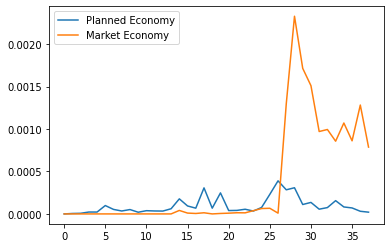

In [32]:
# Plot the frequencies
kwds = ["计划经济", "市场经济"]
F = {"year": list(range(1965, 2003))}
for kwd in kwds:
    F[kwd] = cal_freq(kwd)
df = pd.DataFrame(F)
plt.plot(df["计划经济"].values, label="Planned Economy")
plt.plot(df["市场经济"].values, label="Market Economy")
plt.legend()
plt.show()

## Concordance and Dispersion

To avoid messy outputs, we aggregate the corpus by the courses of Chinese economic reforms, namely 1965 - 1977, 1978 - 1984, 1985 - 1993 and 1994 - 2005.

In [33]:
ph0 = []
ph1 = []
ph2 = []
ph3 = []
for index, piece in rmrb_yr.iterrows():
    if index <= 1977:
        ph0 += piece["tokens"]
    elif index <= 1984:
        ph1 += piece["tokens"]
    elif index <= 1993:
        ph2 += piece["tokens"]
    else:
        ph3 += piece["tokens"]
rmrb_ph = {"ph0": ph0, "ph1": ph1, "ph2": ph2, "ph3": ph3}

#### Concordance

In [34]:
# Function that produces concordance of a given word
def concordance(tokens, kwd):
    text = nltk.Text(tokens)
    idx = nltk.text.ConcordanceIndex(text)
    idx.print_concordance(kwd)

In [35]:
# Display the concordance of "计划经济" ("Planned Economy") over 1965 to 2003
for ph in rmrb_ph:
    tokens_ph = rmrb_ph[ph]
    print("-" * 60)
    concordance(tokens_ph, "计划经济")  

------------------------------------------------------------
Displaying 25 of 58 matches:
 任务 上门服务 过问 使用 马蜂窝 自找麻烦 他们 指标 卡是 社会主义 计划经济 特点 讨论 许多 单位 经验教训 彻底 批判 这种 业务 挂帅 思想 天津
 平衡 成为 平衡 统一 成为 统一 需要 第二年 平衡 统一 就是 我们 计划经济 优越性 事实上 每月 每季 局部 打破 这种 平衡 统一 需要 作出 局部
 银行 外贸 垄断 波兰 存在 无产阶级 专政 时候 具有 社会主义 性质 计划经济 范围 内为 加强 人民政权 经济基础 提高 广大群众 生活 水平 服务 社
这一 对立 两极 正以 显著 方式 发展 资本主义 经济 发展 表现 脱离 计划经济 社会主义 原则 走上 市场调节 价格 经济 刺激 工资 差距 悬殊 通货膨
 使得 资本主义 生产 无政府 状态 苏联 再次出现 工业 自由竞争 代替 计划经济 很多 企业 为了 追求 高额 利润 不择手段 弄虚作假 降低 产品 质量 
 财政开支 主要 用于 发展 社会主义 经济 需要 收支 安排 如果 平衡 计划经济 适当 调节 群众性 增产节约 运动 不是 借内 外债 不是 发行 货币 解
阶级 思想作风 什么 共产主义 协作 什么 资本主义 交易 什么 社会主义 计划经济 什么 资本主义 自由化 什么 社会主义 道路 什么 资本主义 道路 通过 
们 热爱 社会主义 制度 痛恨 那些 破坏 社会主义 生产 破坏 社会主义 计划经济 破坏 社会主义 所有制 敌人 他们 阶级斗争 两条路线 斗争 觉悟 嗅觉 
内部 关系 这个 神圣 园地 下面 几个 方面 揭穿 这个 实质 社会主义 计划经济 还是 资本主义 自由 经济 伟大领袖 毛主席 教导 我们 人类 发展 几十
 社会主义 特征 社会主义 优越 资本主义 重要 标志 孙冶方 妄图 破坏 计划经济 入手 瓦解 统一 社会主义 全民 所有制 计划 问题 所谓 基本 见解 就
整体 一下子 支离破碎 瓦解 竞争 生产 无政府 状态 泛滥成灾 社会主义 计划经济 变成 资本主义 自由 经济 这样 变化 正是 孙冶方 朝思暮想 实现 计划
年 一九五六年 八月 一次 谈话 一九

In [36]:
# Display the concordance of "市场经济" ("Market Economy") over 1965 to 2003
for ph in rmrb_ph:
    tokens_ph = rmrb_ph[ph]
    print("-" * 60)
    concordance(tokens_ph, "市场经济") 

------------------------------------------------------------
no matches
------------------------------------------------------------
Displaying 16 of 16 matches:
见 座谈会 生动活泼 赵紫阳 同志 大家 一起 讨论 主要 问题 计划经济 市场经济 不能 结合 怎样 结合 不能 计划经济 指导 允许 一定 限度 市场经济 
 市场经济 不能 结合 怎样 结合 不能 计划经济 指导 允许 一定 限度 市场经济 大家 认为 计划经济 市场经济 两个 概念 不是 绝对 对立 可以 结合 
合 不能 计划经济 指导 允许 一定 限度 市场经济 大家 认为 计划经济 市场经济 两个 概念 不是 绝对 对立 可以 结合 社会主义 计划经济 社会主义 制
 限制 生产 单位 生产者 积极性 发挥 因此 计划经济 指导 一定 范围 市场经济 作为 补充 必要 现在 一个 很大 问题 生产 销售 脱节 企业 生产 不
 有些 产品 一方面 库存 积压 一方面 市场 脱销 因此 解决 计划经济 市场经济 结合 问题 某种意义 解决 企业 权利 问题 更为重要 大家 指出 搞好 
经济 条件 经济 搞活 关系 国家 经济命脉 列入 计划 其他 可以 通过 市场经济 办法 纳入 间接 计划 总之 经济 工作 搞活 不能 限制 改进 经济 管
学 存在 一种 看法 认为 既然 社会主义 经济 计划经济 资本主义 经济 市场经济 因此 社会主义 经济 市场 不相容 社会主义 计划经济 理解 市场 一种 
这样 两个 传统观念 作祟 一个 市场 自发性 等同 起来 特别 资本主义 市场经济 无政府 状态 等同 起来 一个 计划经济 自然经济 混为一谈 一个 传统观
互 联系 传统观念 保护伞 貌似 坚持 社会主义 计划经济 反对 资本主义 市场经济 口号 许多 符合 社会主义 经济 发展 利益 东西 得到 繁育 滋长 单纯
 相结合 方面 过渡 探索 科技 导报 介绍 世界 上三大 类型 经济体制 市场经济 中央 计划经济 市场 计划 并用 混合经济 长处 短处 此外 一系列 文章
确定 自己 道路 采用 自己 方式 世界 两种 发展 制

#### Common contexts

In [37]:
# Function that produces common contexts of a given word
def common(tokens, kwd):
    text = nltk.Text(tokens)
    text.common_contexts([kwd])

In [38]:
# Display common contexts of "计划经济" ("Planned Economy") over 1965 to 2003
for ph in rmrb_ph:
    tokens_ph = rmrb_ph[ph]
    print("-" * 60)
    common(tokens_ph, "计划经济")

------------------------------------------------------------
社会主义_特点 我们_优越性 性质_范围 脱离_社会主义 代替_很多 平衡_适当 社会主义_什么 社会主义_破坏 社会主义_还是 破坏_入手
社会主义_变成 社会主义_管理体制 社会主义_企业 社会主义_不如 社会主义_社会主义 社会主义_生产 社会主义_鼓吹 社会主义_刘少奇
经济_我们 实行_计划
------------------------------------------------------------
积极性_社会主义 社会主义_保卫 社会主义_罪恶 社会主义_散布 社会主义_一个 社会主义_反动 破坏_一个 社会主义_早已
社会主义_受到破坏 社会主义_条件 实行_消除 坚持_落实 我们_遭受 我们_一个 社会主义_利润 社会主义_制度 发展_发展
问题_市场经济 不能_指导 认为_市场经济
------------------------------------------------------------
社会主义_指导 社会主义_公有 社会主义_商品经济 社会主义_必须 实行_主导 突破_商品经济 认为_商品经济 两国_范畴 实行_不是
计划_具体 风马牛不相及_条块分割 必须_市场调节 市场调节_为主 去年_市场调节 作为_补充 高度集中_变为 行政命令_改为 实行_实行
责任制_商品经济 各级_部门
------------------------------------------------------------
高度集中_转向 传统_观点 几十年_我们 适应_服务 社会主义_社会主义 认为_市场经济 打破_模式 搞不清楚_体制 上海_吃饭 体制_轨道
实行_时期 加快_影响 处于_市场经济 回到_路上 高度集中_管理体制 要求_政府 传统_羁绊 实现_市场经济 突破_社会主义 较之_条件


In [39]:
# Display common contexts of "市场经济" ("Planned Economy") over 1965 to 2003
for ph in rmrb_ph:
    tokens_ph = rmrb_ph[ph]
    print("-" * 60)
    common(tokens_ph, "市场经济")

------------------------------------------------------------
('The following word(s) were not found:', '市场经济')
------------------------------------------------------------
计划经济_不能 限度_大家 计划经济_两个 范围_作为 计划经济_结合 通过_办法 经济_因此 资本主义_无政府 资本主义_口号
经济体制_中央 制度_基础 那样_可以 状态_这是 资本主义_必须 资本主义_巨大 市场调节_第二
------------------------------------------------------------
主导_一定 整个_轨道 繁荣_方面 市场调节_经济 直接_规律 多一些_这方面 吸收_某些 特征_秩序 素质_比较 具有_属性 农民_承受
走向_市场调节 经济_两个 迎来_秩序 即使_发达 完善_机制 更具_机制 社会主义_条件 统一_积极 实现_纲领
------------------------------------------------------------
社会主义_进行 紧密结合_积极 发展_决定 社会主义_金融体制 适应_发展 有序_本质 转向_过程 认为_造成 完全_误解 误解_不是
经济_规则 经济_市场主体 成熟_克服 不是_恰恰 违背_基本 观点_观点 发展_办法 社会主义_大力发展 社会主义_教育 跨入_要求


#### Dispersion Plot

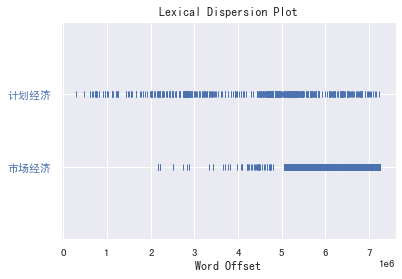

In [40]:
rmrb_all = rmrb_yr["tokens"].sum()
rmrbText = nltk.Text(rmrb_all)

sns.reset_orig()
sns.set(font="SimHei")
rmrbText.dispersion_plot(["计划经济", "市场经济"])
sns.set()

#### Wordl

In [57]:
# Function that plots wordl
def wordl(text, saving_name):
    wc = WordCloud(
        font_path="../data/SimHei.ttf",
        background_color="white", 
        max_words=100, width=800, height=400, 
        random_state=25).generate(text)
    plt.figure(figsize=(15, 15))
    plt.imshow(wc)
    plt.axis("off")
    path = f"../pictures/{saving_name}.png"
    plt.savefig(path, format="png")

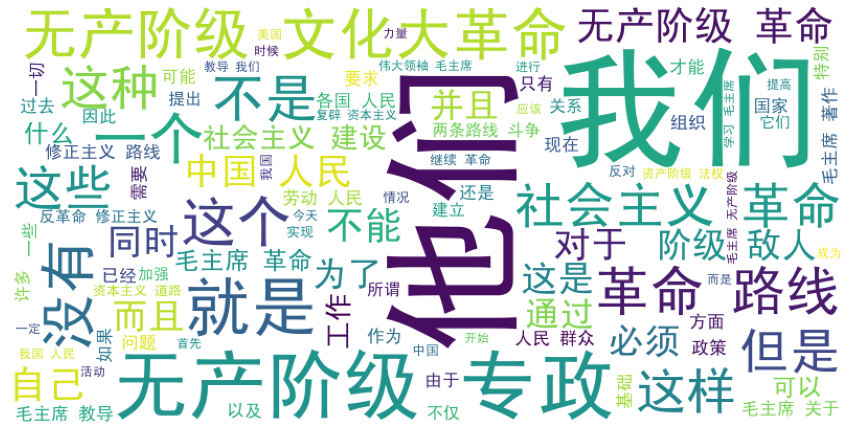

In [58]:
text = ""
for word in rmrb_ph["ph0"]:
    text += word + " "
wordl(text, "ph0")

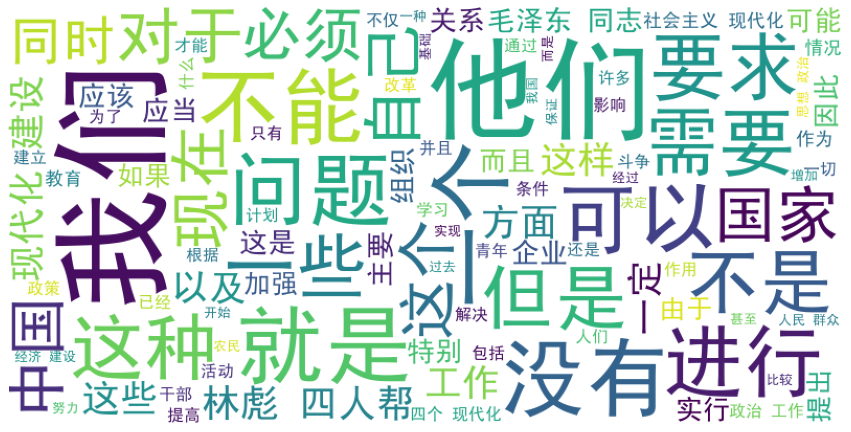

In [59]:
text = ""
for word in rmrb_ph["ph1"]:
    text += word + " "
wordl(text, "ph1")

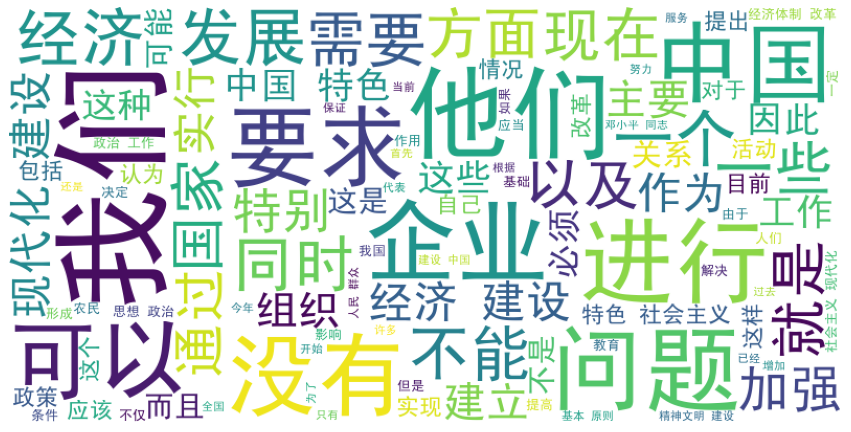

In [60]:
text = ""
for word in rmrb_ph["ph2"]:
    text += word + " "
wordl(text, "ph2")

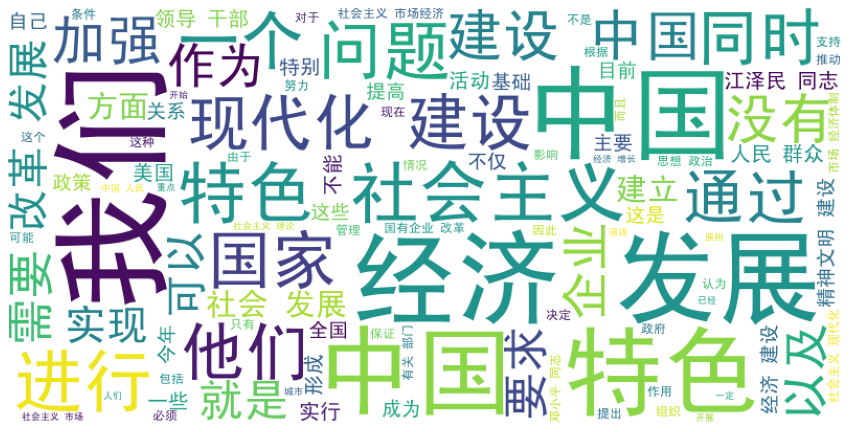

In [61]:
text = ""
for word in rmrb_ph["ph3"]:
    text += word + " "
wordl(text, "ph3")